# Moscow housing prediction

By Hauk Aleksander Olaussen, Charbel Badr and Noran Baskaran

## About the group

TODO

## Introduction

For this project we were tasked to create a machine learning algorithm that could predict house prices in Moscow based on features and known prices of the provided dataset. 

TODO

The following code will allow us to auto reload code when changes are made.

In [6]:
%load_ext autoreload

We begin with importing external and self made modules. Below you can see a description of the modules used:

- `numpy` is the defacto python package for numerical calculation. Most other numerical libraries (including pandas) is based on numpy.
- `pandas` is a widely used package for manipulating (mostly) tabular data
- `matplotlib` is the most used plotting library for python
- `seaborn` contains several convience functions for matplotlib and integrates very well with pandas
- `Visualizer` contains several functions used to plot different parts of the data and their correlation
- `Preprocessor` contains the main bulk of code used to preprocess and feature engineer the data provided to transform the data into something more understandable to a model
- `Model` contiains the model used for predicting the price of an apartment or house based on the data preprocessed by Preprocessor


In [7]:
%autoreload
 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from Visualizer import Visualizer
from Preprocessor import Preprocessor
from Model import Model

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

Epoch 1/1000
32/32 - 0s - loss: 264.4661
Epoch 2/1000
32/32 - 0s - loss: 217.5373
Epoch 3/1000
32/32 - 0s - loss: 169.5802
Epoch 4/1000
32/32 - 0s - loss: 143.7656
Epoch 5/1000
32/32 - 0s - loss: 127.7318
Epoch 6/1000
32/32 - 0s - loss: 116.2771
Epoch 7/1000
32/32 - 0s - loss: 107.4257
Epoch 8/1000
32/32 - 0s - loss: 100.2484
Epoch 9/1000
32/32 - 0s - loss: 94.2367
Epoch 10/1000
32/32 - 0s - loss: 89.0826
Epoch 11/1000
32/32 - 0s - loss: 84.5856
Epoch 12/1000
32/32 - 0s - loss: 80.6060
Epoch 13/1000
32/32 - 0s - loss: 77.0462
Epoch 14/1000
32/32 - 0s - loss: 73.8325
Epoch 15/1000
32/32 - 0s - loss: 70.9083
Epoch 16/1000
32/32 - 0s - loss: 68.2315
Epoch 17/1000
32/32 - 0s - loss: 65.7652
Epoch 18/1000
32/32 - 0s - loss: 63.4824
Epoch 19/1000
32/32 - 0s - loss: 61.3604
Epoch 20/1000
32/32 - 0s - loss: 59.3779
Epoch 21/1000
32/32 - 0s - loss: 57.5057
Epoch 22/1000
32/32 - 0s - loss: 55.7150
Epoch 23/1000
32/32 - 0s - loss: 53.9957
Epoch 24/1000
32/32 - 0s - loss: 52.3524
Epoch 25/1000
32/

## Describing the data

### Apartments

### Plotting some important features

As one can see below, there is a correlation between the total area of an apartment, and what the total price will be. This is of course not surprising, as size is often something that has a strong influence on what the price of an apartment (or house) will be. It is, however, not good enough to produce an accurate prediction based on this data alone. You can see other interesting correlations and connections in the data analysis below.

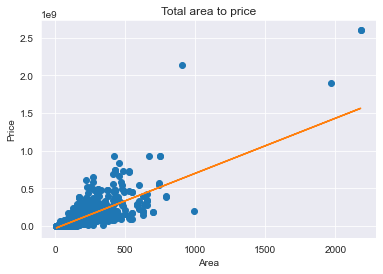

In [8]:
preprocessor = Preprocessor()
visualizer = Visualizer()
data = visualizer
m, b = visualizer.area_to_price(preprocessor.apartments)

If we were to predict based on only this data alone - we could use the linear regression function found, which looks like this rounded to two decimals:

In [4]:
 print("f(x) = %sx %s" % (round(m, 2), round(b, 2)))

f(x) = 731119.6x -30876411.05


TODO Plot more features

### [1] Trying to predict lineraly based on only total area

Now lets try to predict what the housing prices will be using the some of the training data with just the total area as a feature.
This will be a linear prediction based on the following data - the training data:

In [5]:
model = Model()
test_data = preprocessor.apartments
test_data

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23280,23280,NaN,13300000.0,65.0,16.0,32.0,3.0,2.0,NaN,3.00,0.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3139
23281,23281,3.0,15854300.0,56.9,9.6,36.5,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7624
23282,23282,NaN,19800000.0,73.4,23.0,29.3,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8021
23283,23283,0.0,29999000.0,100.8,20.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4591


Below we can see the apartment id and its price prediction based on this linear prediction. 

In [6]:
pred = model.predict_linearly(m, b, test_data)
pred

,id,price
0,0,1.240587e+07
1,1,3.346211e+07
2,2,2.651648e+07
3,3,3.346211e+07
4,4,2.615092e+07
...,...,...
23280,23280,1.664636e+07
23281,23281,1.072429e+07
23282,23282,2.278777e+07
23283,23283,4.282044e+07


Surprise, surprise - it is __really__ bad! <br>
It has a RMSLE of `7.97`, which is __very__ high for this dataset - meaning that this way of predicting prices will not perform well enough!
To be fair - this is not machine learning, as all we do it feeding the linear function an input `total area`, and it will spit out some number `predicted price`. 
This is just pure math with no manipulation or anything - and will rarely be satisfactory when we have data of this magnitude of complexity.

In [7]:
error = model.root_mean_squared_log_error(test_data["price"], pred["price"])
error

7.973258201599909

## [2] How did we manipulate and feature engineer the data to optimize our algorithm?

TODO Explain this (we have littelary not done anything). We all understood that we need to take the other features into consideration as well. We will discuss how we manipulated and feature engineered the data in the next section.

In [1]:
labels = preprocessor.apartments["price"]
merged = preprocessor.merged
merged_test = preprocessor.merged_test
training_data = preprocessor.preprocess(merged, impute = True)
test_data = preprocessor.preprocess(merged_test, impute = True)

fitted = model.fit(training_data, labels)
merged

NameError: name 'preprocessor' is not defined

In [12]:
model = fitted[1][1]
model.fit(training_data, labels)
pred = model.predict(test_data)
pred

array([12779099. , 11312869. ,  7921221.5, ..., 10374338. ,  9690583. ,
       11332764. ], dtype=float32)

In [13]:
model = Model()
model.save_predictions(pred)

,id,price_prediction
0,23285,12779099.0
1,23286,11312869.0
2,23287,7921221.5
3,23288,10233215.0
4,23289,7178537.5
...,...,...
9932,33217,18541864.0
9933,33218,13433799.0
9934,33219,10374338.0
9935,33220,9690583.0


In [14]:
print("Model score: %s" % model.score)
print("Root mean squared log error based on the test set: %s" % model.root_mean_squared_log_error(labels, pred))
model

Model score: None


### Buildings

TODO